Hello everyone,

In this project, it is required to analysis the key indicators of heart disease.
We will work with the [Personal Key Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease).

At first, what are the main steps we should go through in this project?

# TODOs:

1. Understand the problem (look at the big picture)
2. Get the data
3. Analysis and Visualization
3. Features extraction
3. Model Selection
3. Result

# 1. Understand the problem

- Heart disease is one of the leading causes of death for people.
- Key indicators for heart disease can include `blood pressure`, `high cholesterol`, `smoking`, `diabetic status`, `obesity (high BMI)`, `not getting enough physical activity` or `drinking too much alcohol`.
- Detecting the factors that have the **greatest impact** on heart disease is very important in healthcare, Which is our main goal in this notebook.

In [141]:
##################################################### imports #####################################################
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

# 2. Get the data

In [142]:
df = pd.read_csv('./data/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


The dataset contains 18 variables (9 booleans, 5 strings and 4 decimals). In machine learning projects, "HeartDisease" can be used as the explonatory variable, but note that the classes are heavily unbalanced.

| Column          | Description                                                                                                                                                                    |
|-----------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `HeartDisease`    | Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)                                                                          |
| `BMI`             | Body Mass Index (BMI)                                                                                                                                                          |
| `Smoking`         | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]                                                                                  |
| `AlcoholDrinking` | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week                                                               |
| `Stroke`          | (Ever told) (you had) a stroke?                                                                                                                                                |
| `PhysicalHealth`  | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)  |
| `MentalHealth`    | Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)                                                      |
| `DiffWalking`     | Do you have serious difficulty walking or climbing stairs?                                                                                                                     |
| `Sex`             | Are you male or female?                                                                                                                                                        |
| `AgeCategory`     | Fourteen-level age category                                                                                                                                                    |

- Diabetic - Asthma

# 3. Analysis and Visualization

In [143]:
yes_count, no_count, total_size = len(df[df['HeartDisease']=='Yes']), len(df[df['HeartDisease']=='No']), len(df)
print(f'total data samples: {total_size} ({total_size/total_size * 100}%)')
print(f'yes samples: {yes_count} ({round(yes_count/total_size, 1) * 100}%)')
print(f'no samples: {no_count} ({round(no_count/total_size, 1) * 100}%)')
print(f'Data is free of missing values: {"❌" if df.isna().all().all() else "✔"}')

total data samples: 319795 (100.0%)
yes samples: 27373 (10.0%)
no samples: 292422 (90.0%)
Data is free of missing values: ✔


## 3.1 Analyze Categorical Key indicators
- Sex
- GenHealth
- Smoking
- AlcoholDrinking
- KidneyDisease
- SkinCancer
- Stroke
- Diabetic
- Asthma
- DiffWalking
- Race

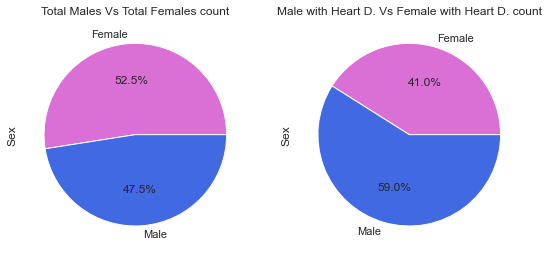

In [144]:
fig, axes = plt.subplots(nrows=1, ncols=2)
colors = ['orchid', 'royalblue']

df['Sex'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total Males Vs Total Females count', colors=colors)
df[df['HeartDisease']=='Yes']['Sex'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='Male with Heart D. Vs Female with Heart D. count', colors=colors)
plt.show()

> Males are more prone to heart disease.

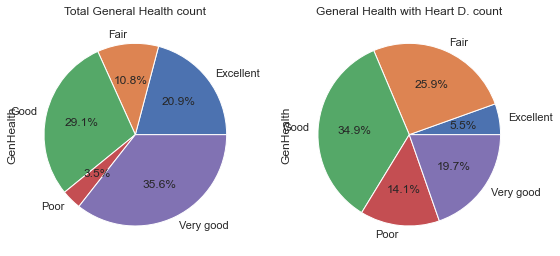

In [145]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['GenHealth'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total General Health count')
df[df['HeartDisease']=='Yes']['GenHealth'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='General Health with Heart D. count')
plt.show()

> There is obvious correlation between general health and heart disease.

In [146]:
df.groupby(['Sex', 'HeartDisease']).count()

BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
Sex    HeartDisease                                                             
Female No            156571   156571           156571  156571          156571   
       Yes            11234    11234            11234   11234           11234   
Male   No            135851   135851           135851  135851          135851   
       Yes            16139    16139            16139   16139           16139   

                     MentalHealth  DiffWalking  AgeCategory    Race  Diabetic  \
Sex    HeartDisease                                                             
Female No                  156571       156571       156571  156571    156571   
       Yes                  11234        11234        11234   11234     11234   
Male   No                  135851       135851       135851  135851    135851   
       Yes                  16139        16139        16139   16139     16139   

                     PhysicalActivity  GenHealth  SleepTime  Asthma  \
Sex    HeartDisease                                                   
Female No                      156571     156571     156571  156571   
       Yes                      11234      11234      11234   11234   
Male   No                      135851     135851     135851  135851   
       Yes                      16139      16139      16139   16139   

                     KidneyDisease  SkinCancer  
Sex    HeartDisease                             
Female No                   156571      156571  
       Yes                   11234       11234  
Male   No                   135851      135851  
       Yes                   16139       16139

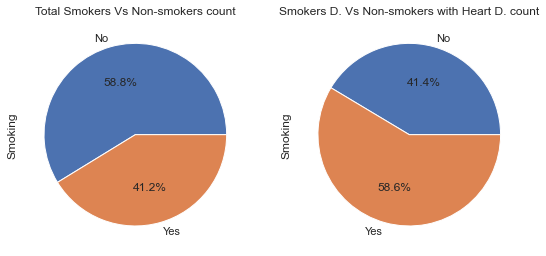

In [147]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['Smoking'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total Smokers Vs Non-smokers count')
df[df['HeartDisease']=='Yes']['Smoking'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='Smokers D. Vs Non-smokers with Heart D. count')
plt.show()

1. Resume visulaizing the categorical key indicators as above
2. Visualize the continous indic.
3. 

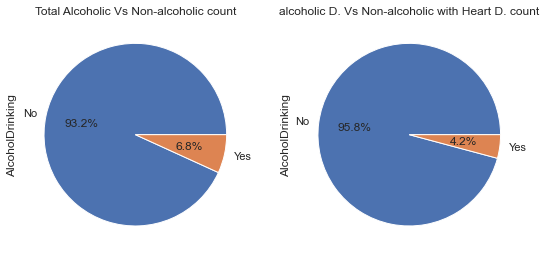

In [148]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['AlcoholDrinking'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total Alcoholic Vs Non-alcoholic count')
df[df['HeartDisease']=='Yes']['AlcoholDrinking'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='alcoholic D. Vs Non-alcoholic with Heart D. count')
plt.show()

> From the plot, it appears that `AlcoholDrinking` won't be a strong indicator.

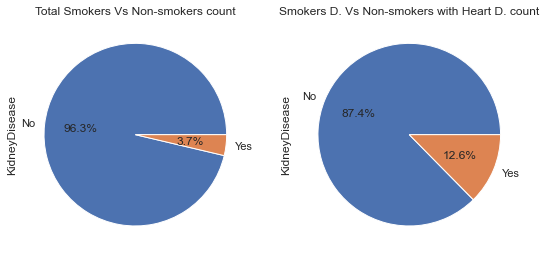

In [149]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['KidneyDisease'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total Smokers Vs Non-smokers count')
df[df['HeartDisease']=='Yes']['KidneyDisease'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='Smokers D. Vs Non-smokers with Heart D. count')
plt.show()

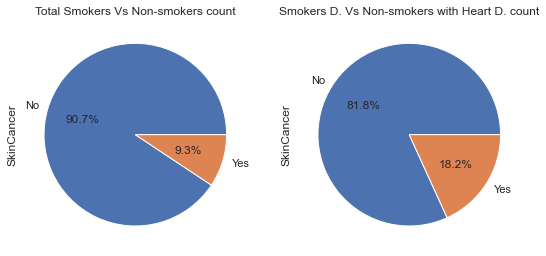

In [150]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['SkinCancer'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total Smokers Vs Non-smokers count')
df[df['HeartDisease']=='Yes']['SkinCancer'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='Smokers D. Vs Non-smokers with Heart D. count')
plt.show()

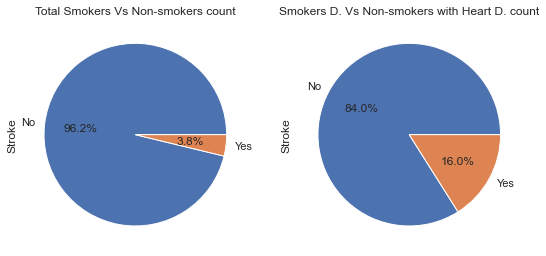

In [151]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['Stroke'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total Smokers Vs Non-smokers count')
df[df['HeartDisease']=='Yes']['Stroke'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='Smokers D. Vs Non-smokers with Heart D. count')
plt.show()

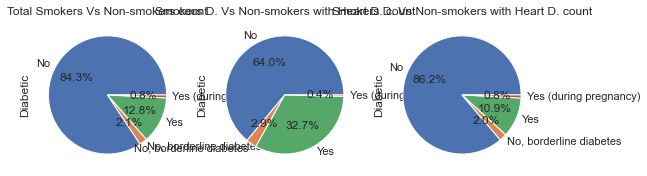

In [152]:
fig, axes = plt.subplots(nrows=1, ncols=3)

df['Diabetic'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total Smokers Vs Non-smokers count')
df[df['HeartDisease']=='Yes']['Diabetic'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='Smokers D. Vs Non-smokers with Heart D. count')
df[df['HeartDisease']=='No']['Diabetic'].value_counts().sort_index().plot(kind='pie', ax=axes[2], figsize=(9, 5), autopct='%1.1f%%', title='Smokers D. Vs Non-smokers with Heart D. count')
plt.show()

In [153]:
df[df['HeartDisease']=='Yes']['Diabetic'].value_counts()

No                         17519
Yes                         8957
No, borderline diabetes      789
Yes (during pregnancy)       108
Name: Diabetic, dtype: int64

In [154]:
df[df['HeartDisease']=='No']['Diabetic'].value_counts()

No                         252134
Yes                         31845
No, borderline diabetes      5992
Yes (during pregnancy)       2451
Name: Diabetic, dtype: int64

> To be encoded as:
- No        : 0
- Preg.     : 1
- Borderline: 2
- Yes       : 3

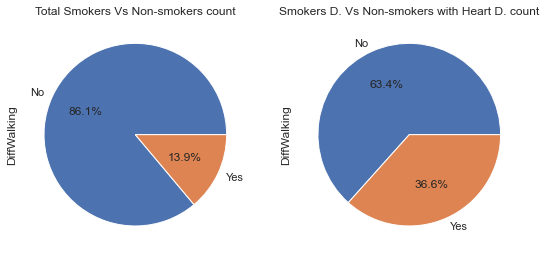

In [155]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['DiffWalking'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total Smokers Vs Non-smokers count')
df[df['HeartDisease']=='Yes']['DiffWalking'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='Smokers D. Vs Non-smokers with Heart D. count')
plt.show()

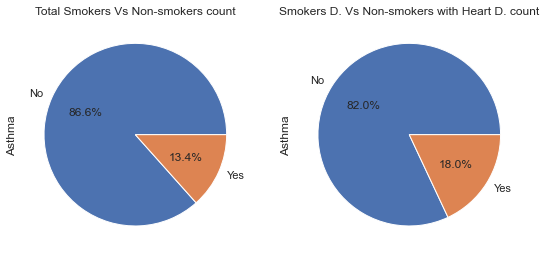

In [156]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['Asthma'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total Smokers Vs Non-smokers count')
df[df['HeartDisease']=='Yes']['Asthma'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='Smokers D. Vs Non-smokers with Heart D. count')
plt.show()

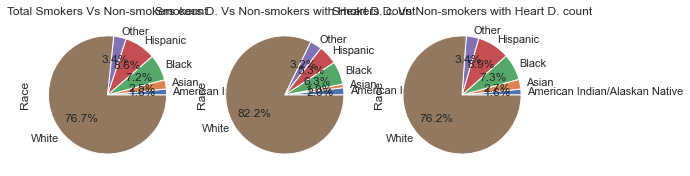

In [157]:
fig, axes = plt.subplots(nrows=1, ncols=3)

df['Race'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total Smokers Vs Non-smokers count')
df[df['HeartDisease']=='Yes']['Race'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='Smokers D. Vs Non-smokers with Heart D. count')
df[df['HeartDisease']=='No']['Race'].value_counts().sort_index().plot(kind='pie', ax=axes[2], figsize=(9, 5), autopct='%1.1f%%', title='Smokers D. Vs Non-smokers with Heart D. count')
plt.show()

> It appears not important

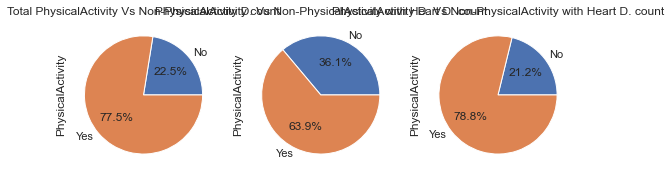

In [209]:
fig, axes = plt.subplots(nrows=1, ncols=3)

df['PhysicalActivity'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total PhysicalActivity Vs Non-PhysicalActivity count')
df[df['HeartDisease']=='Yes']['PhysicalActivity'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='PhysicalActivity D. Vs Non-PhysicalActivity with Heart D. count')
df[df['HeartDisease']=='No']['PhysicalActivity'].value_counts().sort_index().plot(kind='pie', ax=axes[2], figsize=(9, 5), autopct='%1.1f%%', title='PhysicalActivity D. Vs Non-PhysicalActivity with Heart D. count')
plt.show()

<AxesSubplot:xlabel='HeartDisease,PhysicalActivity'>

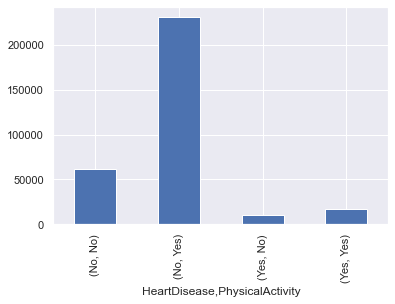

In [211]:
df.groupby(['HeartDisease', 'PhysicalActivity']).size().plot(kind='bar')

## 3.1 Analyze Continous Key indicators

### Convert Age into continous instead of categorical

In [158]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [159]:
from statistics import mean
AgeCategoryToContinous = lambda age : round(mean(map(int, age.split(' ')[0].split('-'))))
df['Age'] = df['AgeCategory'].apply(AgeCategoryToContinous)
df.drop('AgeCategory', axis=1, inplace=True)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,White,Yes,Yes,Very good,5.0,Yes,No,Yes,57
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,White,No,Yes,Very good,7.0,No,No,No,80
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,White,Yes,Yes,Fair,8.0,Yes,No,No,67
3,No,24.21,No,No,No,0.0,0.0,No,Female,White,No,No,Good,6.0,No,No,Yes,77
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,White,No,Yes,Very good,8.0,No,No,No,42


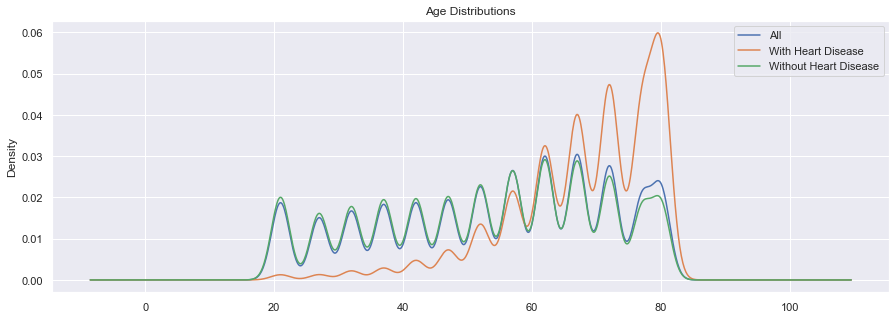

In [186]:
all_ages = df['Age'].rename("All", inplace=False)
ages_with_heart_disease = df[df['HeartDisease']=='Yes']['Age'].rename("With Heart Disease", inplace=False)
ages_without_heart_disease = df[df['HeartDisease']=='No']['Age'].rename("Without Heart Disease", inplace=False)

all_ages.plot(kind='kde', figsize=(15,5))
ages_with_heart_disease.plot(kind='kde', figsize=(15, 5))
ages_without_heart_disease.plot(kind='kde', figsize=(15, 5))
plt.title("Age Distributions")
plt.legend()
plt.show()

> Old people are more prune to Heart Disease.

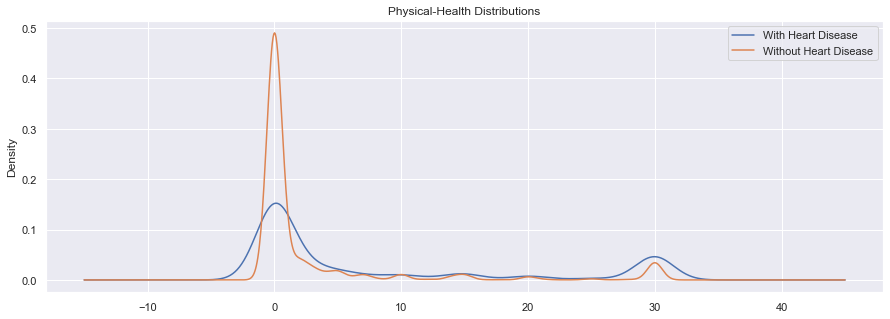

In [204]:
physical_with_heart_disease = df[df['HeartDisease']=='Yes']['PhysicalHealth'].rename("With Heart Disease", inplace=False)
physical_without_heart_disease = df[df['HeartDisease']=='No']['PhysicalHealth'].rename("Without Heart Disease", inplace=False)

physical_with_heart_disease.plot(kind='kde', figsize=(15, 5))
physical_without_heart_disease.plot(kind='kde', figsize=(15, 5))
plt.title("Physical-Health Distributions")
plt.legend()
plt.show()

> It doesn't add an new info regarding the Heart disease

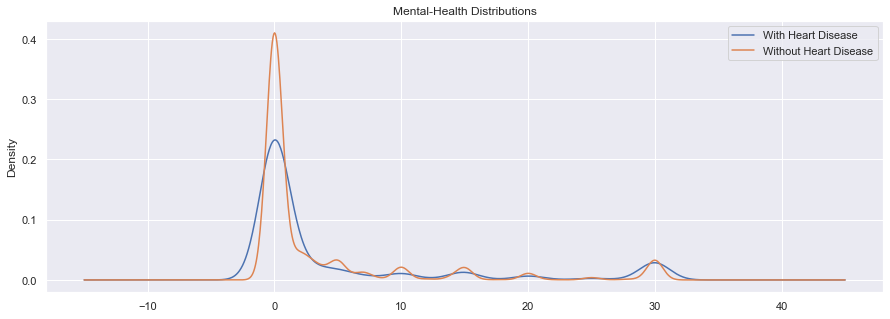

In [195]:
mental_with_heart_disease = df[df['HeartDisease']=='Yes']['MentalHealth'].rename("With Heart Disease", inplace=False)
mental_without_heart_disease = df[df['HeartDisease']=='No']['MentalHealth'].rename("Without Heart Disease", inplace=False)

mental_with_heart_disease.plot(kind='kde', figsize=(15, 5))
mental_without_heart_disease.plot(kind='kde', figsize=(15, 5))
plt.title("Mental-Health Distributions")
plt.legend()
plt.show()

> It doesn't add an new info regarding the Heart disease

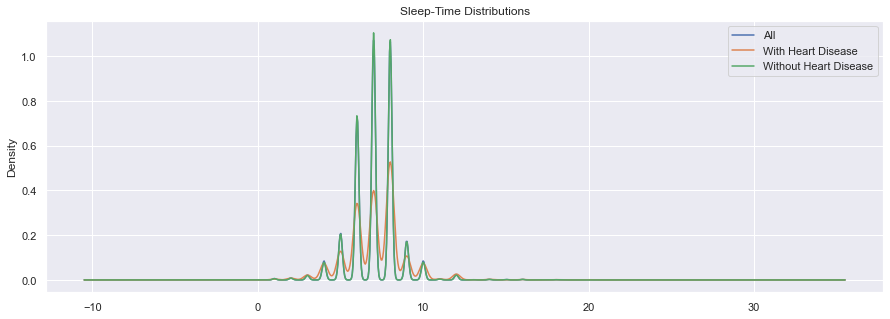

In [198]:
all_sleep = df['SleepTime'].rename("All", inplace=False)
sleep_with_heart_disease = df[df['HeartDisease']=='Yes']['SleepTime'].rename("With Heart Disease", inplace=False)
sleep_without_heart_disease = df[df['HeartDisease']=='No']['SleepTime'].rename("Without Heart Disease", inplace=False)

all_sleep.plot(kind='kde', figsize=(15, 5))
sleep_with_heart_disease.plot(kind='kde', figsize=(15, 5))
sleep_without_heart_disease.plot(kind='kde', figsize=(15, 5))
plt.title("Sleep-Time Distributions")
plt.legend()
plt.show()

> Sleep will be discarded from our analysis too.

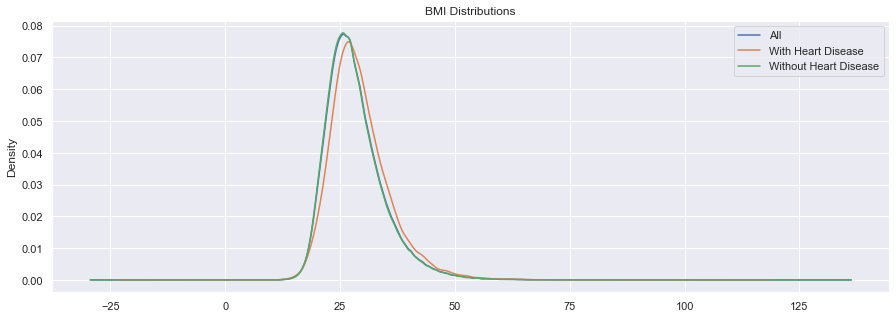

In [212]:
all_bmi = df['BMI'].rename("All", inplace=False)
bmi_with_heart_disease = df[df['HeartDisease']=='Yes']['BMI'].rename("With Heart Disease", inplace=False)
bmi_without_heart_disease = df[df['HeartDisease']=='No']['BMI'].rename("Without Heart Disease", inplace=False)

all_bmi.plot(kind='kde', figsize=(15, 5))
bmi_with_heart_disease.plot(kind='kde', figsize=(15, 5))
bmi_without_heart_disease.plot(kind='kde', figsize=(15, 5))
plt.title("BMI Distributions")
plt.legend()
plt.show()

In [213]:
df['PhysicalActivity']

0         Yes
1         Yes
2         Yes
3          No
4         Yes
         ... 
319790     No
319791    Yes
319792    Yes
319793     No
319794    Yes
Name: PhysicalActivity, Length: 319795, dtype: object

In [218]:
df.query('PhysicalActivity == "Yes" and 18.5<=BMI<=24.9')['HeartDisease'].value_counts()

No     74928
Yes     4309
Name: HeartDisease, dtype: int64

In [222]:
def BMIContinousToCategory(bmi):
    if bmi < 18.5:
        return "underweight"
    elif bmi < 24.5:
        return "normal"
    elif bmi < 30:
        return "overweight"
    else:
        return "obese"
df['BMICategory'] = df['BMI'].apply(BMIContinousToCategory)

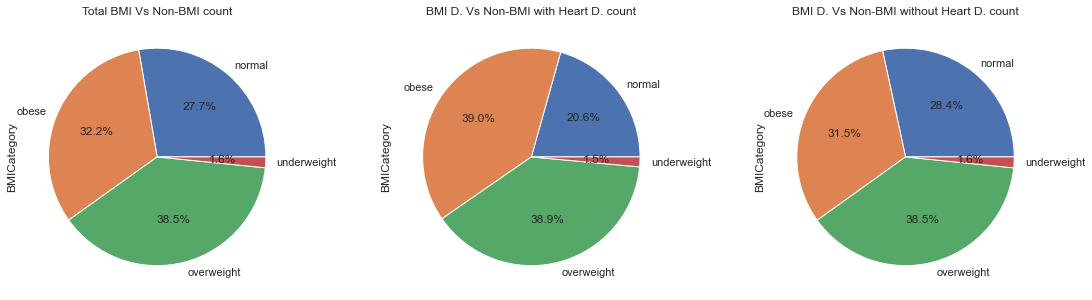

In [227]:
fig, axes = plt.subplots(nrows=1, ncols=3)

df['BMICategory'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(19, 5), autopct='%1.1f%%', title='Total BMI Vs Non-BMI count')
df[df['HeartDisease']=='Yes']['BMICategory'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(19, 5), autopct='%1.1f%%', title='BMI D. Vs Non-BMI with Heart D. count')
df[df['HeartDisease']=='No']['BMICategory'].value_counts().sort_index().plot(kind='pie', ax=axes[2], figsize=(19, 5), autopct='%1.1f%%', title='BMI D. Vs Non-BMI without Heart D. count')
plt.show()

In [220]:
df.query('PhysicalActivity == "Yes" and not 18.5<=BMI<=24.9')['HeartDisease'].value_counts()

No     155540
Yes     13180
Name: HeartDisease, dtype: int64

Adult Body Mass Index or BMI
- If your BMI is less than 18.5, it falls within the underweight range.
- If your BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range.
- If your BMI is 25.0 to 29.9, it falls within the overweight range.
- If your BMI is 30.0 or higher, it falls within the obese range.


In [232]:
encoded_df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Race',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Age', 'BMICategory'],
      dtype='object')

In [256]:
binary_categories = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
encoded_df = df.copy()
for category in binary_categories:
    encoded_df[category].replace({'Yes':1, 'No':0}, inplace=True)

encoded_df['Sex'].replace({'Female':1, 'Male':0}, inplace=True)
encoded_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age,BMICategory
0,0,16.60,1,0,0,3.0,30.0,0,1,White,Yes,1,Very good,5.0,1,0,1,57,underweight
1,0,20.34,0,0,1,0.0,0.0,0,1,White,No,1,Very good,7.0,0,0,0,80,normal
2,0,26.58,1,0,0,20.0,30.0,0,0,White,Yes,1,Fair,8.0,1,0,0,67,overweight
3,0,24.21,0,0,0,0.0,0.0,0,1,White,No,0,Good,6.0,0,0,1,77,normal
4,0,23.71,0,0,0,28.0,0.0,1,1,White,No,1,Very good,8.0,0,0,0,42,normal


In [257]:
df.Diabetic.unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [258]:
bmi_dict = {
    'underweight': 0,
    'normal': 1,
    'overweight': 2,
    'obese': 3
}

gen_dict = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}

diabetic_dict = {
    'No': 0,
    'Yes (during pregnancy)': 1,
    'No, borderline diabetes': 2,
    'Yes': 3
}

encoded_df['BMICategory'].replace(bmi_dict, inplace=True)
encoded_df['GenHealth'].replace(gen_dict, inplace=True)
encoded_df['Diabetic'].replace(diabetic_dict, inplace=True)

encoded_df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age,BMICategory
0,0,16.60,1,0,0,3.0,30.0,0,1,White,3,1,3,5.0,1,0,1,57,0
1,0,20.34,0,0,1,0.0,0.0,0,1,White,0,1,3,7.0,0,0,0,80,1
2,0,26.58,1,0,0,20.0,30.0,0,0,White,3,1,1,8.0,1,0,0,67,2
3,0,24.21,0,0,0,0.0,0.0,0,1,White,0,0,2,6.0,0,0,1,77,1
4,0,23.71,0,0,0,28.0,0.0,1,1,White,0,1,3,8.0,0,0,0,42,1


In [259]:
encoded_df.drop("Race", axis=1, inplace=True)
encoded_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age,BMICategory
0,0,16.60,1,0,0,3.0,30.0,0,1,3,1,3,5.0,1,0,1,57,0
1,0,20.34,0,0,1,0.0,0.0,0,1,0,1,3,7.0,0,0,0,80,1
2,0,26.58,1,0,0,20.0,30.0,0,0,3,1,1,8.0,1,0,0,67,2
3,0,24.21,0,0,0,0.0,0.0,0,1,0,0,2,6.0,0,0,1,77,1
4,0,23.71,0,0,0,28.0,0.0,1,1,0,1,3,8.0,0,0,0,42,1


In [263]:
from statistics import median
from sklearn.model_selection import cross_val_score

def cross_val_classifiers(X, Y, clfs, labels=None):
    scores = []
    best_median_score = 0
    best_clf_idx = 0
    for i in range(len(clfs)):
        score = cross_val_score(clfs[i], X, Y)
        scores.append(score)
        m = median(score)
        if m > best_median_score:
            best_median_score = m
            best_clf_idx = i
    
    if labels is None:
        labels = clfs
        
    scores_df = pd.DataFrame(columns=labels, data=np.array(scores).T)
    return scores_df, best_clf_idx 

In [265]:
class_0 = encoded_df[encoded_df['HeartDisease'] == 0]
class_1 = encoded_df[encoded_df['HeartDisease'] == 1]

len(class_0), len(class_1)

(292422, 27373)

In [269]:
from sklearn.ensemble import RandomForestClassifier

class_0 = encoded_df[encoded_df['HeartDisease'] == 0]
class_1 = encoded_df[encoded_df['HeartDisease'] == 1]

class_0 = class_0.sample(len(class_1),replace=False)
train_df = pd.concat([class_0, class_1], axis=0)
print('Data in Train:')
print(train_df['HeartDisease'].value_counts())

labels = train_df['HeartDisease']
train_df = train_df.drop('HeartDisease', axis=1)
out, _ = cross_val_classifiers(train_df, labels, [RandomForestClassifier()])


Data in Train:
0    27373
1    27373
Name: HeartDisease, dtype: int64


In [270]:
out

,RandomForestClassifier()
0,0.749772
1,0.744452
2,0.741894
3,0.742260
4,0.735136
